In [1]:
%load_ext autoreload
%autoreload 2
from causallib.estimation import (
    DoublyRobustIpFeature,
    DoublyRobustJoffe,
    DoublyRobustVanilla,
    IPW,
    Standardization,
    StratifiedStandardization,
    MarginalOutcomeEstimator,
    Matching,
    PropensityMatching, 
    MatchingTransformer,
    MatchingIndividualOutcomeEstimator,
)
from causallib.datasets import load_nhefs,load_card_krueger,load_acic16,load_lalonde
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd

makeipw = lambda : IPW(learner=LogisticRegression(solver="liblinear"))
makestd = lambda : StratifiedStandardization(learner=LinearRegression())
all_estimators = [
    MarginalOutcomeEstimator(learner=LinearRegression()),

    Matching(),
    PropensityMatching(learner=LogisticRegression(solver="liblinear"),caliper=0.02),
    MatchingIndividualOutcomeEstimator(),

    IPW(learner=LogisticRegression(solver="liblinear")),
    Standardization(learner=LinearRegression()),
    StratifiedStandardization(learner=LinearRegression()),
    
    DoublyRobustIpFeature(makestd(), makeipw()),
    DoublyRobustJoffe(makestd(), makeipw()),
    DoublyRobustVanilla(makestd(), makeipw()),
    
]


def get_all_estimates(x,a,y):
    estimates = {}
    for estimator in all_estimators:
        try:
            estimator.fit(x, a, y)
        except:
            estimator.fit(x,a)
        estimator_name = estimator.__class__.__name__
        try:
            estimates[estimator_name] = estimator.estimate_population_outcome(x, a,y)
        except Exception as E:
            print(f"Failed with exception {str(E)}")
    estimates_df = pd.concat(estimates,axis=1).T
    estimates_df = estimates_df.assign(ATE=estimates_df[1] - estimates_df[0])
    return estimates_df

In [2]:
data_nhefs = load_nhefs()
data_cardkrueger = load_card_krueger()
data_acic16 = load_acic16()
data_lalonde = load_lalonde()


In [3]:
all_estimates = [get_all_estimates(dataset.X,dataset.a,dataset.y) for dataset in [data_nhefs,data_cardkrueger,data_acic16,data_lalonde]]

wt82_71
Automatic pdb calling has been turned ON
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla
                                           0         1       ATE
MarginalOutcomeEstimator            1.984498  4.525079  2.540581
Matching                            1.805062  5.251410  3.446349
PropensityMatching                  1.702332  5.549849  3.847517
MatchingIndividualOutcomeEstimator  1.805062  5.251410  3.446349
IPW                                 1.749876  5.240249  3.490373
Standardization                     1.747216  5.209838  3.462622
StratifiedStandardization           1.765108  5.200907  3.435799
DoublyRobustIpFeature               1.758167  5.184302  3.426135
DoublyRobustJoffe                   1.765126  5.161229  3.396103
DoublyRobustVanilla                 1.761707  5.205193  3.443486
EMPTOT2
Automatic pdb calling has been tur

In [33]:
all_datasets = [data_nhefs,data_cardkrueger,data_acic16,data_lalonde]

In [10]:
all_estimates = [get_all_estimates(dataset.X,dataset.a,dataset.y) for dataset in all_datasets]

MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla


In [54]:

all_estimates[-1].loc["DoublyRobustIpFeature"] = pd.np.nan
all_estimates[-1].loc["DoublyRobustVanilla"] = pd.np.nan

all_estimates_m[-1].loc["DoublyRobustIpFeature"] = pd.np.nan
all_estimates_m[-1].loc["DoublyRobustVanilla"] = pd.np.nan

all_estimates_m2[-1].loc["DoublyRobustIpFeature"] = pd.np.nan
all_estimates_m2[-1].loc["DoublyRobustVanilla"] = pd.np.nan



<ipython-input-54-86bcbb787b8a>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates[-1].loc["DoublyRobustIpFeature"] = pd.np.nan
<ipython-input-54-86bcbb787b8a>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates[-1].loc["DoublyRobustVanilla"] = pd.np.nan
<ipython-input-54-86bcbb787b8a>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates_m[-1].loc["DoublyRobustIpFeature"] = pd.np.nan
<ipython-input-54-86bcbb787b8a>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates_m[-1].loc["DoublyRobustVanilla"] = pd.np.nan
<ipython-input-54-86bcbb787b8a>:7: FutureWarning: The pandas.np module is deprecated

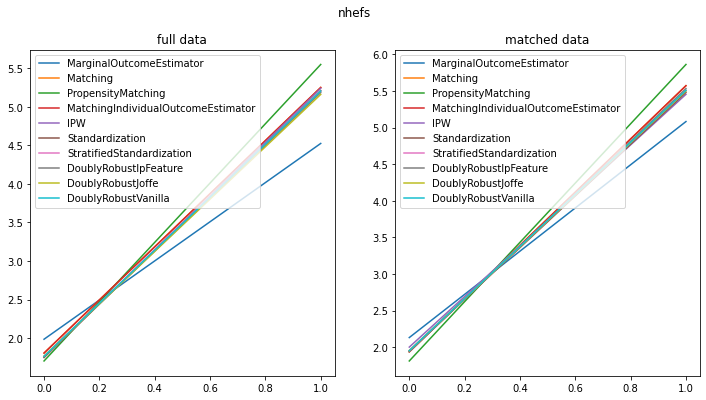

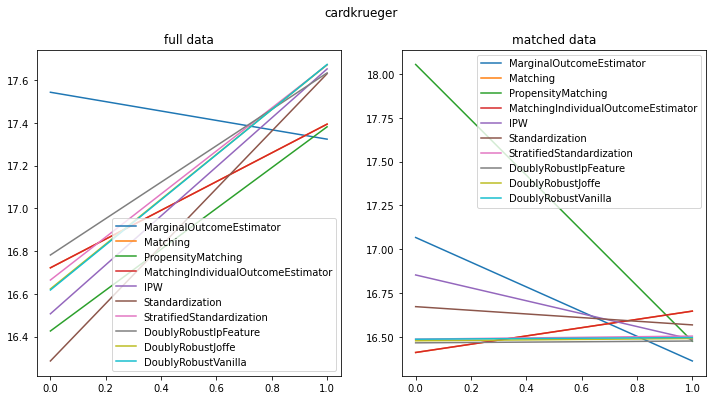

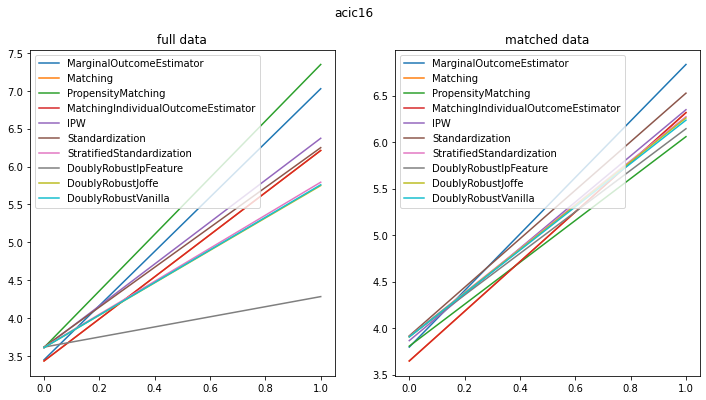

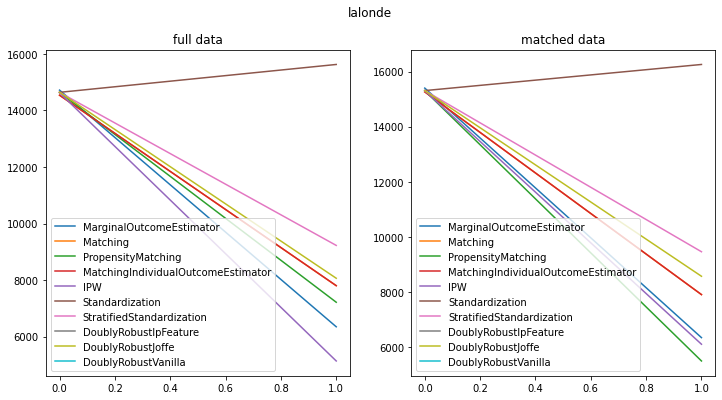

In [55]:
import matplotlib.pyplot as plt
for k,v,vm in zip(["nhefs","cardkrueger","acic16","lalonde"],all_estimates,all_estimates_m2):
    f,[a0,a1] = plt.subplots(1,2,figsize=(12,6))
    v[[0,1]].T.plot(ax=a0)
    a0.set_title("full data")
    vm[[0,1]].T.plot(ax=a1)
    a1.set_title("matched data")
    plt.suptitle(k)


<ipython-input-48-2b75ed0b9a22>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates[-1].loc["DoublyRobustIpFeature"] = pd.np.nan
<ipython-input-48-2b75ed0b9a22>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates[-1].loc["DoublyRobustVanilla"] = pd.np.nan
<ipython-input-48-2b75ed0b9a22>:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates_m[-1].loc["DoublyRobustIpFeature"] = pd.np.nan
<ipython-input-48-2b75ed0b9a22>:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  all_estimates_m[-1].loc["DoublyRobustVanilla"] = pd.np.nan


In [21]:
data_lalonde.y.describe()

count     22106.000000
mean      14645.443781
std       10856.237319
min           0.000000
25%        4461.257000
50%       15185.120000
75%       25207.062500
max      121173.580000
Name: re78, dtype: float64

In [51]:
from causallib.preprocessing.transformers import PropensityTransformer
propensity_transform = PropensityTransformer(learner=LogisticRegression(solver="liblinear"),include_covariates=True)
mt = MatchingTransformer(propensity_transform=propensity_transform,caliper=0.0005,n_neighbors=3)


In [52]:
all_estimates_m2 = []
for data in all_datasets:
    matched_data = mt.fit_transform(*unbunch(data))
    print(f"{len(data.X)} -> {len(matched_data[0])}")
    all_estimates_m2.append(get_all_estimates(*matched_data))

1566 -> 1091
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla
347 -> 140
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla
4802 -> 2766
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla
22106 -> 20430
MarginalOutcomeEstimator
Matching
PropensityMatching
MatchingIndividualOutcomeEstimator
IPW
Standardization
StratifiedStandardization
DoublyRobustIpFeature
DoublyRobustJoffe
DoublyRobustVanilla


In [32]:
data_lalonde.X.shape

(22106, 27)

In [26]:
%pdb off

Automatic pdb calling has been turned OFF
